In [1]:
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error
from google.colab import files
uploaded = files.upload()

Saving MagicBricks.csv to MagicBricks.csv


#Load Data

In [12]:
df=pd.read_csv("MagicBricks.csv")
df.dtypes

Area           float64
BHK              int64
Bathroom       float64
Furnishing      object
Locality        object
Parking        float64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

In [3]:
df2=df.copy()

##pairplot & correlation

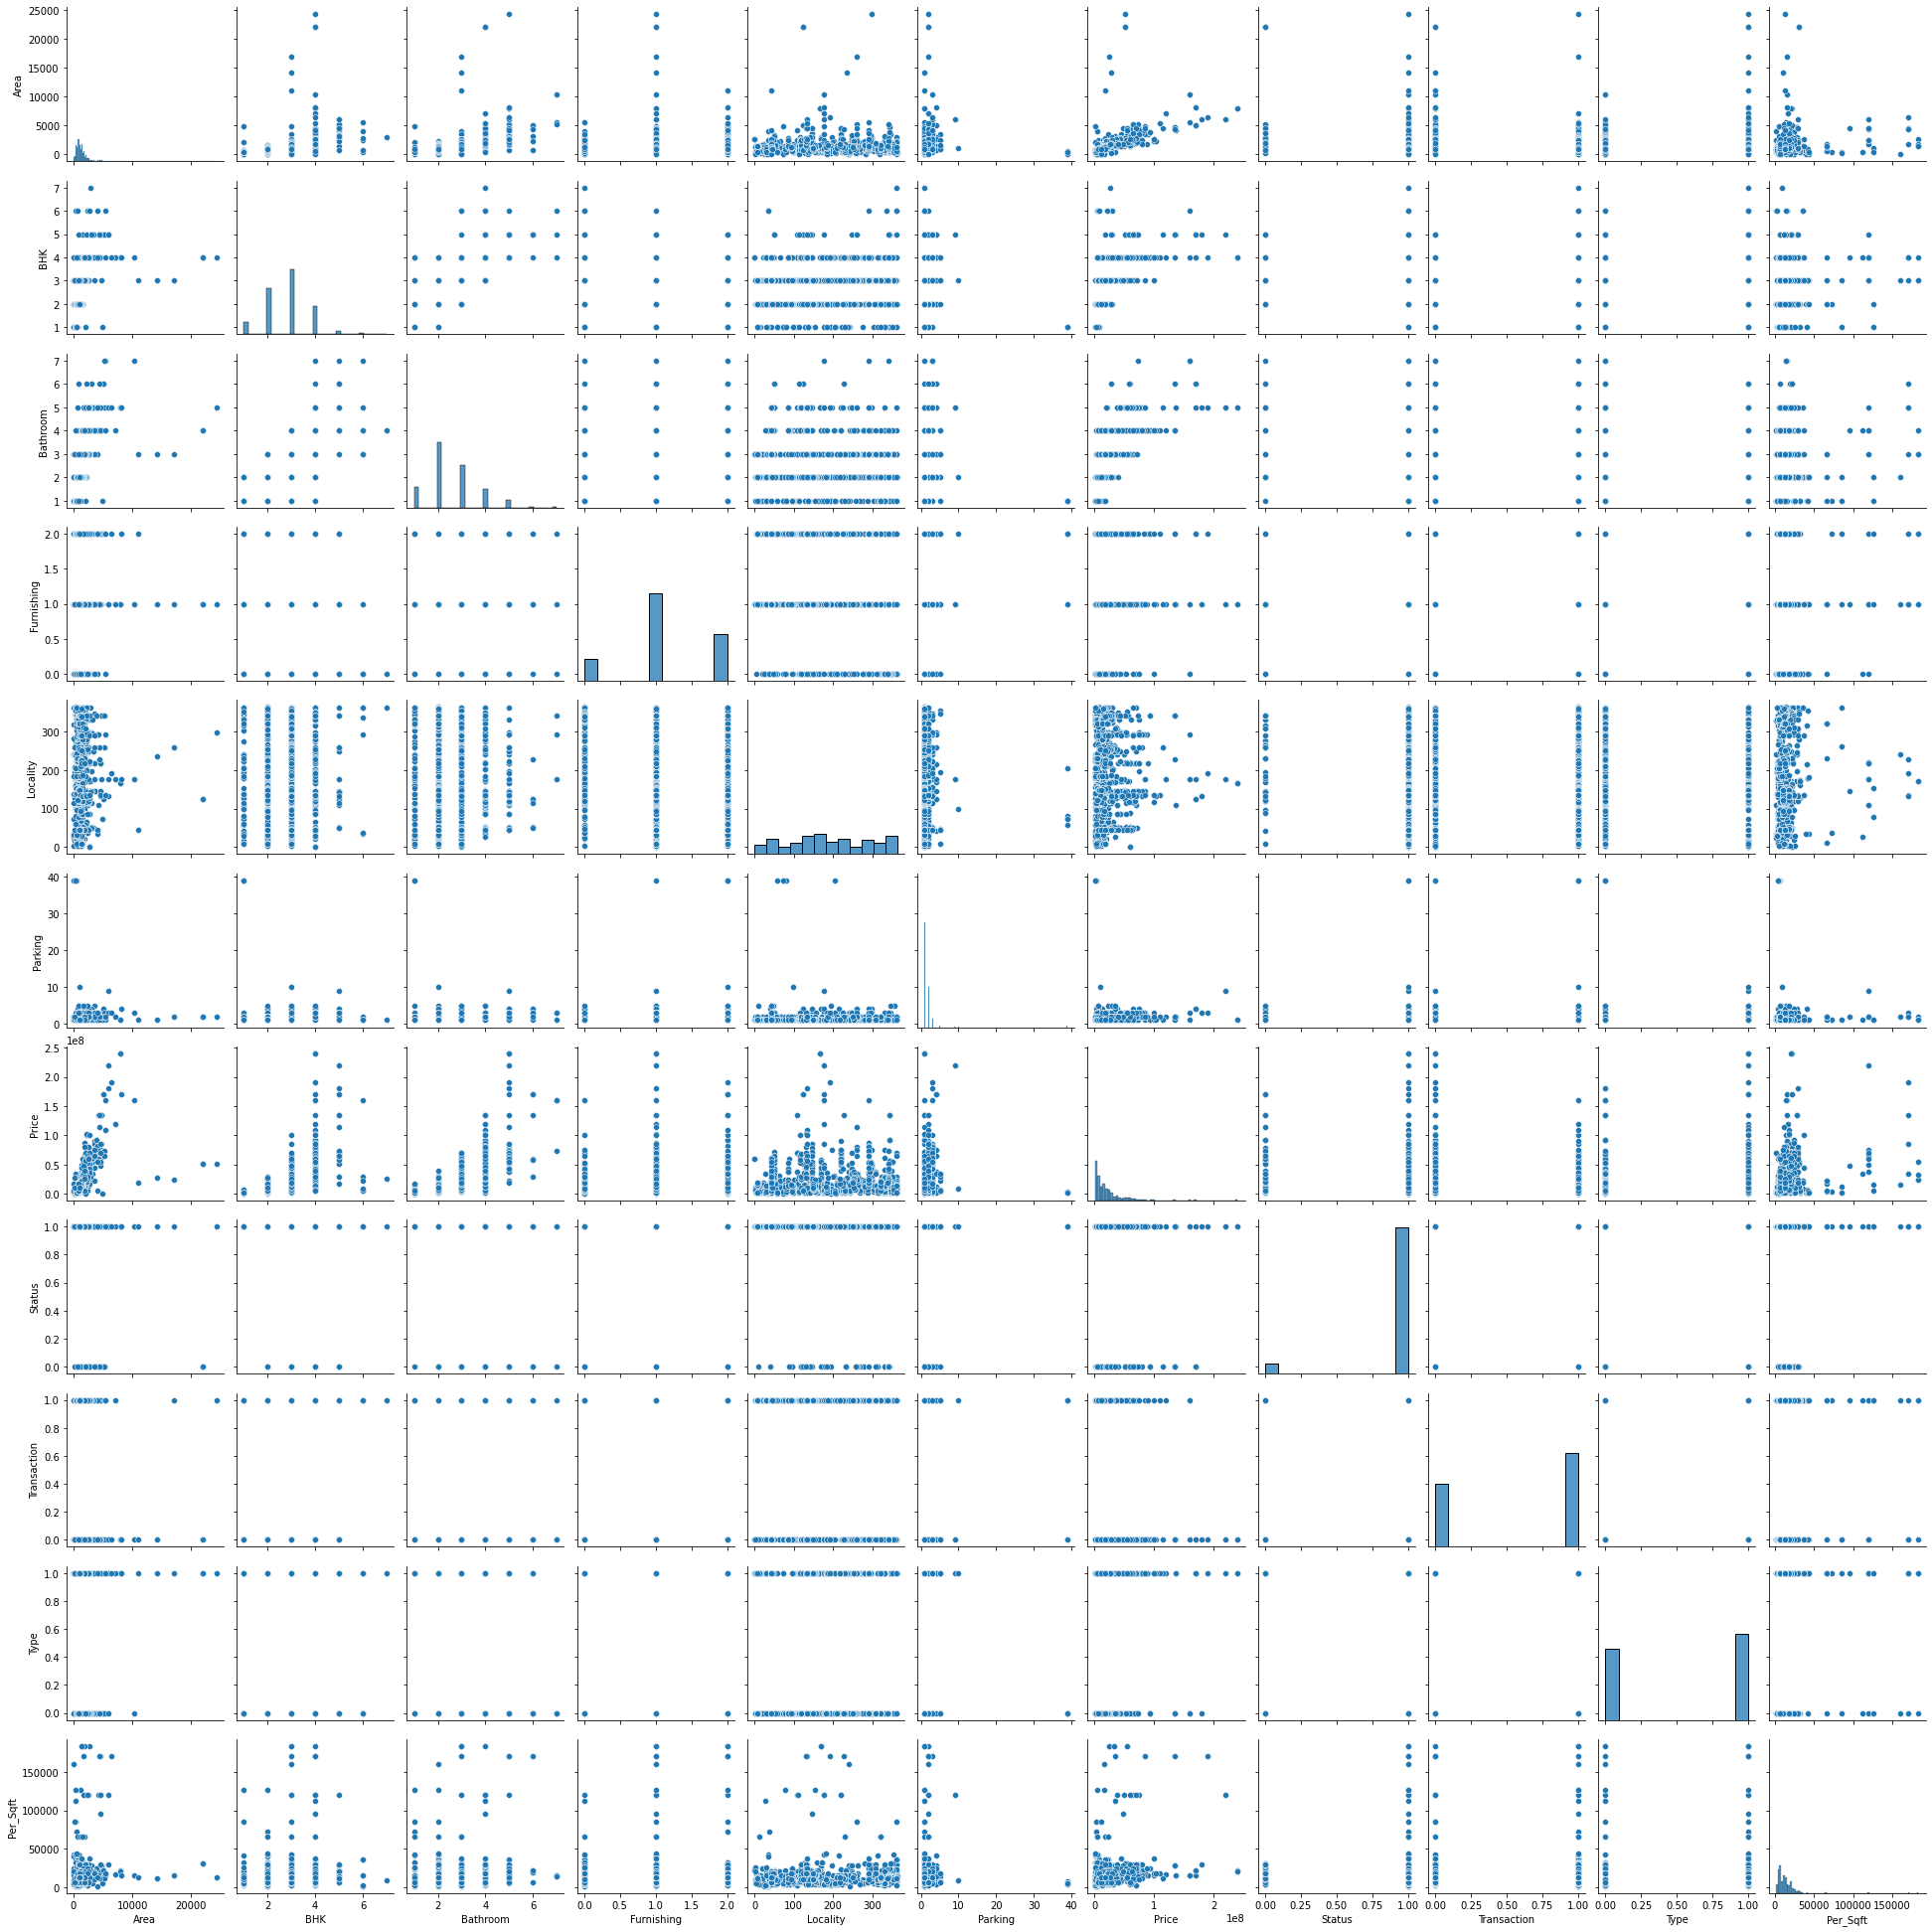

In [192]:
sns.pairplot(df2)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
Area,1.000000,0.463013,0.535153,-0.004031,0.029453,0.004128,0.574410,-0.168953,-0.122460,0.096259,0.165277
BHK,0.463013,1.000000,0.811590,-0.124754,0.100654,-0.085984,0.599587,-0.124534,-0.162742,0.137134,0.181284
Bathroom,0.535153,0.811590,1.000000,-0.052592,0.031314,-0.030707,0.732241,-0.139878,-0.195648,0.135381,0.220475
Furnishing,-0.004031,-0.124754,-0.052592,1.000000,-0.069725,0.090868,0.008934,-0.035516,-0.006310,-0.042112,-0.005167
Locality,0.029453,0.100654,0.031314,-0.069725,1.000000,-0.088571,0.046358,-0.121062,-0.032508,0.035539,0.000223
Parking,0.004128,-0.085984,-0.030707,0.090868,-0.088571,1.000000,0.035894,0.018006,0.006557,-0.067408,0.001607
Price,0.574410,0.599587,0.732241,0.008934,0.046358,0.035894,1.000000,-0.192469,-0.214012,0.105376,0.325240
Status,-0.168953,-0.124534,-0.139878,-0.035516,-0.121062,0.018006,-0.192469,1.000000,0.247739,0.077798,-0.022598
Transaction,-0.122460,-0.162742,-0.195648,-0.006310,-0.032508,0.006557,-0.214012,0.247739,1.000000,-0.187700,-0.034016
Type,0.096259,0.137134,0.135381,-0.042112,0.035539,-0.067408,0.105376,0.077798,-0.187700,1.000000,0.086476


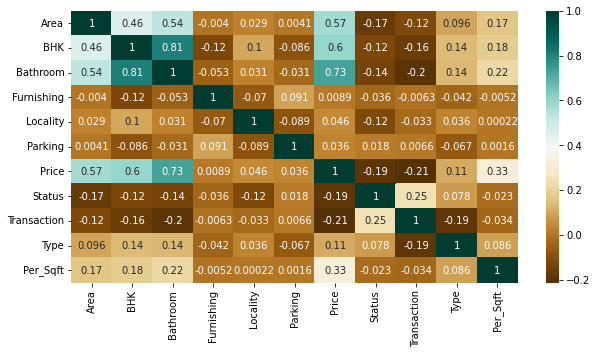

In [138]:
plt.figure(figsize=(10,5))
c = df2.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

#Data preprocessing

##Duplicates and null values

In [13]:
duplicate_rows_data = df2[df2.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)
print(df.isnull().sum())

number of duplicate rows:  (83, 11)
Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1259 non-null   int64  
 4   Locality     1259 non-null   int64  
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   int64  
 8   Transaction  1259 non-null   int64  
 9   Type         1259 non-null   int64  
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 108.3 KB


In [15]:
df2.head(2)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,1,283,1.0,6500000,1,0,1,NaN
1,750.0,2,2.0,1,139,1.0,5000000,1,0,0,6667.0


In [16]:
from sklearn.preprocessing import LabelEncoder
for i in df2.columns:
  if df2[i].dtypes=='object':
    df2[i]=LabelEncoder().fit_transform(df2[i])

In [17]:
df2.head(2)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,1,283,1.0,6500000,1,0,1,NaN
1,750.0,2,2.0,1,139,1.0,5000000,1,0,0,6667.0


In [18]:
df2.describe()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1259.000000,1259.000000,1226.000000,1.259000e+03,1259.000000,1259.000000,1259.000000,1018.000000
mean,1466.452724,2.796664,2.556086,1.150913,184.577442,1.935563,2.130670e+07,0.940429,0.620334,0.532963,15690.136542
std,1568.055040,0.954425,1.042220,0.653550,104.355640,6.279212,2.560115e+07,0.236785,0.485497,0.507011,21134.738568
min,28.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000e+06,0.000000,0.000000,0.000000,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,102.000000,1.000000,5.700000e+06,1.000000,0.000000,0.000000,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,173.000000,1.000000,1.420000e+07,1.000000,1.000000,1.000000,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,277.000000,2.000000,2.550000e+07,1.000000,1.000000,1.000000,18000.000000
max,24300.000000,10.000000,7.000000,3.000000,364.000000,114.000000,2.400000e+08,1.000000,1.000000,2.000000,183333.000000


In [19]:
print('dataset shape before delete null values: ' +str(df2.shape))
print(df2.isnull().sum())
df2=df2.dropna()
print(df2.isnull().sum())
print('dataset shape after delete null values: '+ str(df2.shape))

dataset shape before delete null values: (1259, 11)
Area             0
BHK              0
Bathroom         2
Furnishing       0
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             0
Per_Sqft       241
dtype: int64
Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64
dataset shape after delete null values: (1005, 11)


##Delete layers with bad correlation

In [20]:
#df3 = df2.drop(['yr_renovated','yr_built','sqft_lot','street','condition'], axis=1)
df3 = df2.filter(items=['Price','Per_Sqft','Type','Locality','Bathroom','BHK','Area'])

In [21]:
print('Dataset with all layers')
print(df2.info())
print('Dataset without bad correlation values')
print(df3.info())

Dataset with all layers
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 1 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1005 non-null   float64
 1   BHK          1005 non-null   int64  
 2   Bathroom     1005 non-null   float64
 3   Furnishing   1005 non-null   int64  
 4   Locality     1005 non-null   int64  
 5   Parking      1005 non-null   float64
 6   Price        1005 non-null   int64  
 7   Status       1005 non-null   int64  
 8   Transaction  1005 non-null   int64  
 9   Type         1005 non-null   int64  
 10  Per_Sqft     1005 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 94.2 KB
None
Dataset without bad correlation values
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 1 to 1258
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     1005 non-null   int64  
 1   

##Delete outliyers

###Data visualization

####Price

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


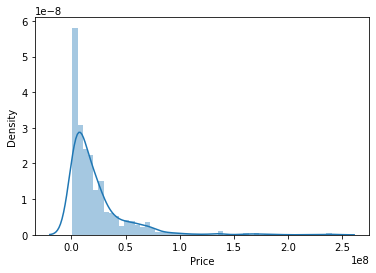

In [22]:
sns.distplot(df3.Price)

####Per_Sqft

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


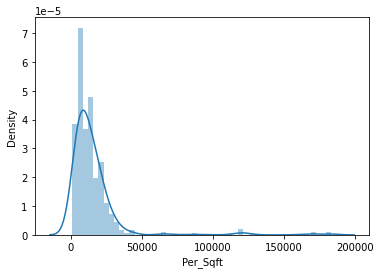

In [33]:
sns.distplot(df3.Per_Sqft)

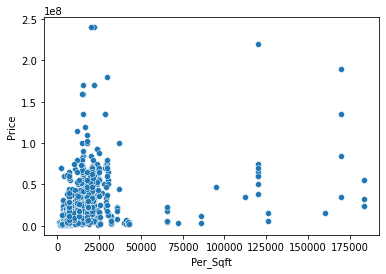

In [35]:
sns.scatterplot(data = df3, x='Per_Sqft',y='Price')

In [36]:
df3.Per_Sqft.describe()

count      1005.000000
mean      15663.630846
std       21170.160448
min        1259.000000
25%        6364.000000
50%       11363.000000
75%       18000.000000
max      183333.000000
Name: Per_Sqft, dtype: float64

####Type

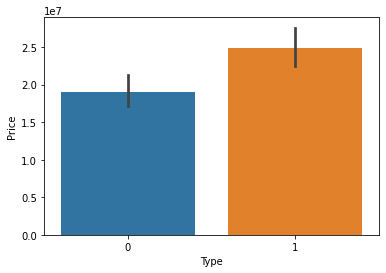

In [26]:
sns.barplot(x=df3.Type , y = df3.Price)

####Bathroom

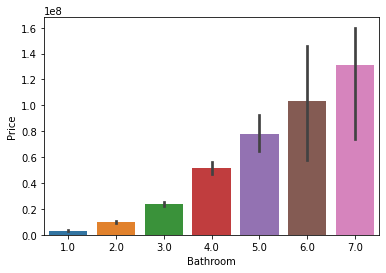

In [29]:
sns.barplot(x=df3.Bathroom , y = df3.Price)

####Bedroom

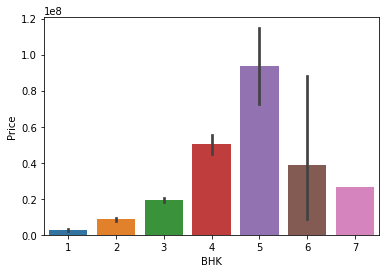

In [30]:
sns.barplot(x=df3.BHK , y = df3.Price)

####Area

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


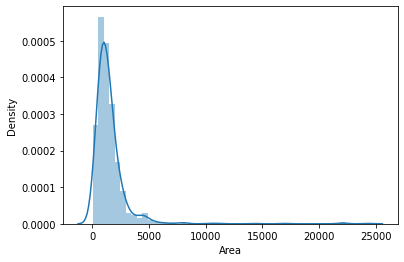

In [41]:
sns.distplot(df3.Area)

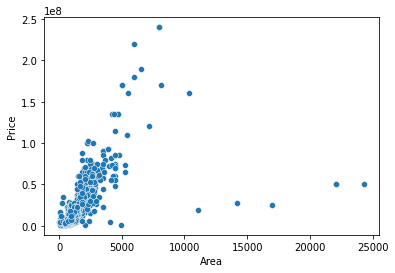

In [42]:
sns.scatterplot(data = df3, x='Area',y='Price')

In [43]:
df3.Area.describe()

count     1005.000000
mean      1504.301968
std       1729.104830
min         28.000000
25%        770.000000
50%       1150.000000
75%       1700.000000
max      24300.000000
Name: Area, dtype: float64

###IQR

In [44]:
Q1 = df3.quantile(0.25)
Q3 = df3.quantile(0.75)
IQR = Q3 - Q1
print('IQR')
print(IQR)
print('Data shape before delete outliers' + str(df3.shape))
df4 = df3[~((df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Data shape after delete outliers' + str(df4.shape))

IQR
Price       21870000.0
Per_Sqft       11636.0
Type               1.0
Locality         165.0
Bathroom           1.0
BHK                1.0
Area             930.0
dtype: float64
Data shape before delete outliers(1005, 7)
Data shape after delete outliers(846, 7)


###Data visualization

####Price

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


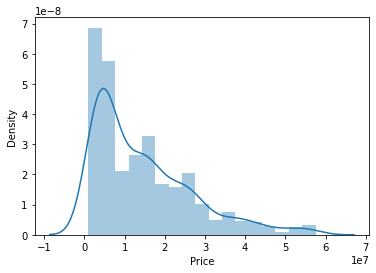

In [55]:
sns.distplot(df4.Price)

####Per_Sqft

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


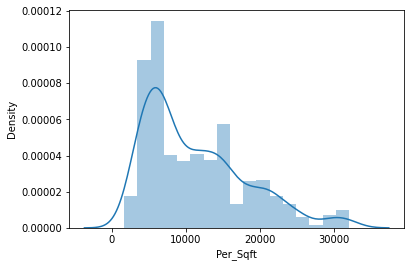

In [56]:
sns.distplot(df4.Per_Sqft)

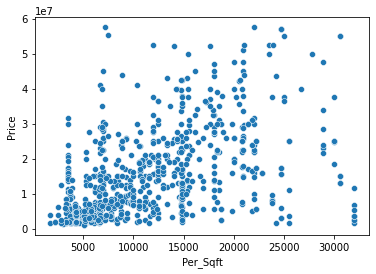

In [57]:
sns.scatterplot(data = df4, x='Per_Sqft',y='Price')

In [58]:
df4.Per_Sqft.describe()

count      846.000000
mean     11316.013002
std       6884.671357
min       1667.000000
25%       6111.000000
50%       9655.000000
75%      14888.000000
max      32000.000000
Name: Per_Sqft, dtype: float64

####Type

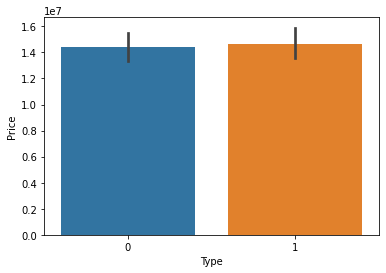

In [59]:
sns.barplot(x=df4.Type , y = df4.Price)

####Bathroom

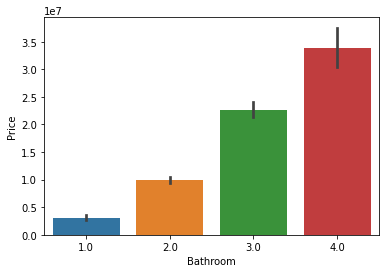

In [60]:
sns.barplot(x=df4.Bathroom , y = df4.Price)

####Bedroom

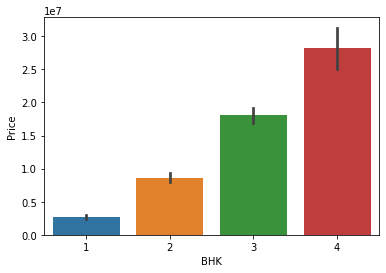

In [61]:
sns.barplot(x=df4.BHK , y = df4.Price)

####Area

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


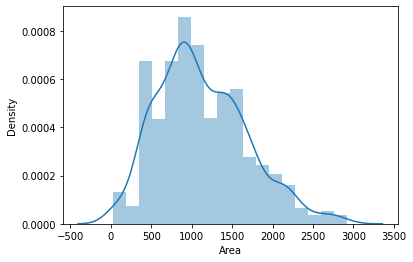

In [62]:
sns.distplot(df4.Area)

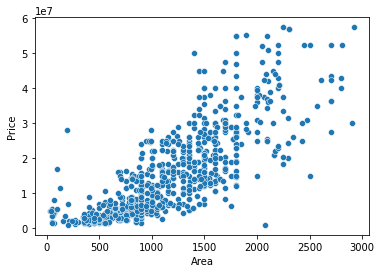

In [63]:
sns.scatterplot(data = df4, x='Area',y='Price')

In [64]:
df4.Area.describe()

count     846.000000
mean     1126.459633
std       556.544982
min        28.000000
25%       726.000000
50%      1032.500000
75%      1500.000000
max      2925.000000
Name: Area, dtype: float64

##Dataset train-test split

In [154]:
df4.head()

,Price,Per_Sqft,Type,Locality,Bathroom,BHK,Area
1,5000000,6667.0,0,139,2.0,2,750.0
2,15500000,6667.0,0,49,2.0,2,950.0
3,4200000,6667.0,1,281,2.0,2,600.0
4,6200000,6667.0,1,282,2.0,2,650.0
5,15500000,6667.0,1,281,3.0,4,1300.0


In [144]:
y = df4[['Price']]
x = df4.drop([ 'Price'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print('x_train shape: ' + str(x_train.shape) + ' y_train shape' + str(y_train.shape) 
  + ' x_test shape' + str(x_test.shape) + ' y_test shape' + str(y_test.shape))

x_train shape: (676, 6) y_train shape(676, 1) x_test shape(170, 6) y_test shape(170, 1)


#Regression

##Linear Regression

In [145]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
val = lr.predict(x_train)
print('Train')
print("score: " + str(r2_score(y_train,val)))
print("MSE: "+ str(mse(y_train,val,squared=False)))
print("MAE: " + str(mean_absolute_error(y_train,val)))
#Validacion
print('Validation')
val2 = lr.predict(x_test)
print("score: " + str(r2_score(y_test,val2)))
print("MSE: "+ str(mse(y_test,val2,squared=False)))
print("MAE: " + str(mean_absolute_error(y_test,val2)))

Train
score: 0.7582184787132986
MSE: 6062988.105274937
MAE: 4403294.472098435
Validation
score: 0.7046621607800674
MSE: 6713778.465045135
MAE: 4656392.879546414


In [146]:
from sklearn import linear_model
lr = linear_model.ElasticNet(alpha=.00001).fit(x_train,y_train)
val = lr.predict(x_train)
print('Train')
print("score: " + str(r2_score(y_train,val)))
print("MSE: "+ str(mse(y_train,val,squared=False)))
print("MAE: " + str(mean_absolute_error(y_train,val)))
#Validation
print('Validation')
val2 = lr.predict(x_test)
print("score: " + str(r2_score(y_test,val2)))
print("MSE: "+ str(mse(y_test,val2,squared=False)))
print("MAE: " + str(mean_absolute_error(y_test,val2)))

Train
score: 0.7582184786972409
MSE: 6062988.10547627
MAE: 4403290.2978235455
Validation
score: 0.7046624016221024
MSE: 6713775.727569297
MAE: 4656388.450693536


###Cross Validation Linear Regression

In [147]:
rf = LinearRegression()

scores = cross_val_score(rf, x, y, cv=5)

print("score",scores)

print("mean :%0.03f , deviation: :%0.03f" % (scores.mean(), scores.std()))

score [0.71693107 0.69789041 0.73840727 0.42918691 0.68445656]
mean :0.653 , deviation: :0.114


##Random Forest Regressor

In [148]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
val = rf_model.predict(x_train)
print('Train')
print("score: " + str(r2_score(y_train,val)))
print("MSE: "+ str(mse(y_train,val,squared=False)))
print("MAE: " + str(mean_absolute_error(y_train,val)))
#Validacion
print('Validation')
val2 = rf_model.predict(x_test)
print("score: " + str(r2_score(y_test,val2)))
print("MSE: "+ str(mse(y_test,val2,squared=False)))
print("MAE: " + str(mean_absolute_error(y_test,val2)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Train
score: 0.9753489500515307
MSE: 1935944.372563514
MAE: 1198614.1950874568
Validation
score: 0.8131828293813561
MSE: 5339687.674500462
MAE: 3513850.1176111475


###Cross Validation Random Forest

In [149]:
rf = RandomForestRegressor()

scores = cross_val_score(rf, x, y, cv=5)

print("score",scores)

print("mean :%0.03f , deviation: :%0.03f" % (scores.mean(), scores.std()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

score [0.66035327 0.83568995 0.85623888 0.502324   0.69349407]
mean :0.710 , deviation: :0.129


##Decision Tree Regressor

In [150]:
from sklearn.tree import DecisionTreeRegressor
h_dat_model = DecisionTreeRegressor()
h_dat_model.fit(x_train, y_train)
val = h_dat_model.predict(x_train)
print('Train')
print("score: " + str(r2_score(y_train,val)))
print("MSE: "+ str(mse(y_train,val,squared=False)))
print("MAE: " + str(mean_absolute_error(y_train,val)))
#Validacion
print('Validation')
val2 = h_dat_model.predict(x_test)
print("score: " + str(r2_score(y_test,val2)))
print("MSE: "+ str(mse(y_test,val2,squared=False)))
print("MAE: " + str(mean_absolute_error(y_test,val2)))

Train
score: 0.9994490188295592
MSE: 289429.99821351917
MAE: 36834.319526627216
Validation
score: 0.6933155890953143
MSE: 6841531.180144463
MAE: 4419372.549019608


##AdaBoost Regressor

In [151]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor( n_estimators=100)
regr.fit(x_train, y_train)
val = regr.predict(x_train)
print('Train')
print("score: " + str(r2_score(y_train,val)))
print("MSE: "+ str(mse(y_train,val,squared=False)))
print("MAE: " + str(mean_absolute_error(y_train,val)))
#Validacion
print('Validation')
val2 = regr.predict(x_test)
print("score: " + str(r2_score(y_test,val2)))
print("MSE: "+ str(mse(y_test,val2,squared=False)))
print("MAE: " + str(mean_absolute_error(y_test,val2)))

Train
score: 0.8028980500487797
MSE: 5474199.538500532
MAE: 4607340.938635015
Validation
score: 0.7290095240759973
MSE: 6431088.320986531
MAE: 5088052.203019808


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##Model comparation

LienarRegression
score: 0.7582184786972409
score: 0.7046624016221024
RandomForest
score: 0.9753489500515307
score: 0.8131828293813561
DecisionTree
score: 0.9994490188295592
score: 0.6933155890953143
adaboost
score: 0.8028980500487797
score: 0.7290095240759973


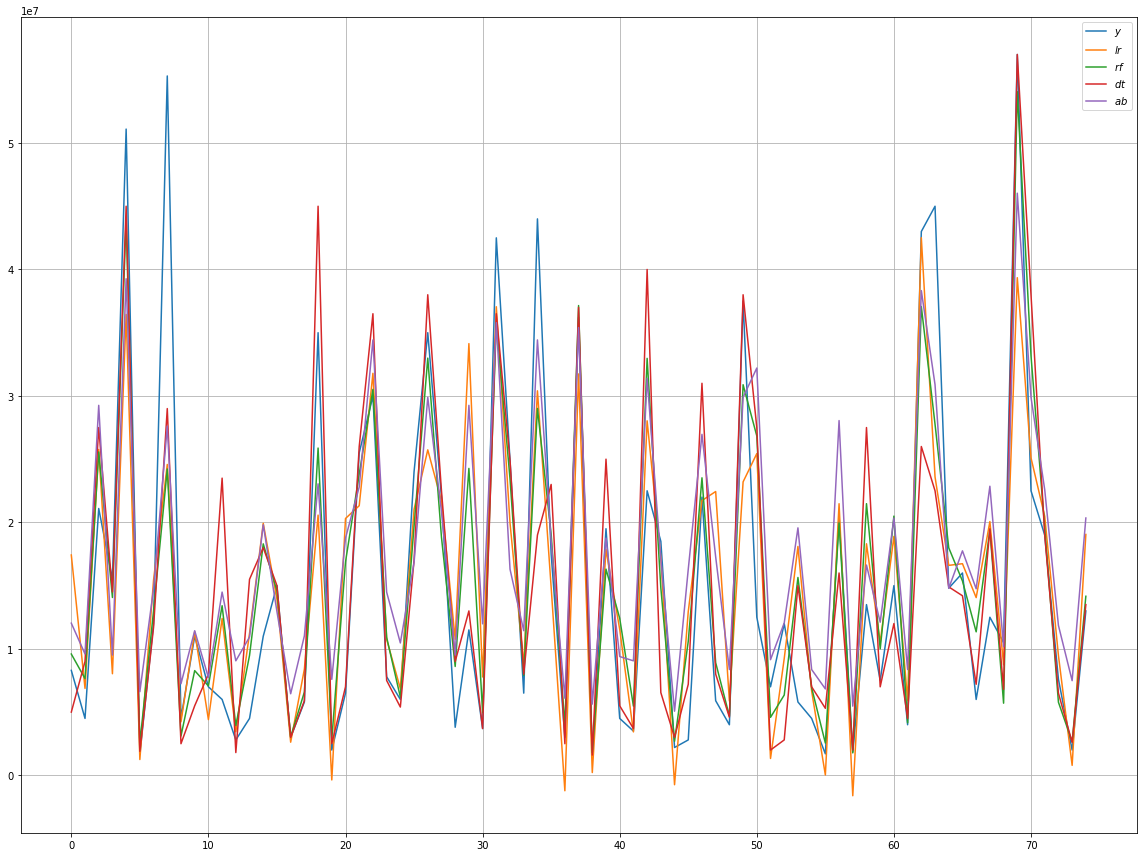

In [152]:
plt.figure(figsize=(20,15))
y_val=y_test.values
plt.plot(y_val[0:75], label='$y$')
print('LienarRegression')
val = lr.predict(x_train)
val2 = lr.predict(x_test)
plt.plot(val2[0:75], label='$lr$')
print("score: " + str(r2_score(y_train,val)))
print("score: " + str(r2_score(y_test,val2)))
print('RandomForest')
val = rf_model.predict(x_train)
val2 = rf_model.predict(x_test)
plt.plot(val2[0:75], label='$rf$')
print("score: " + str(r2_score(y_train,val)))
print("score: " + str(r2_score(y_test,val2)))
print('DecisionTree')
val = h_dat_model.predict(x_train)
val2 = h_dat_model.predict(x_test)
plt.plot(val2[0:75], label='$dt$')
print("score: " + str(r2_score(y_train,val)))
print("score: " + str(r2_score(y_test,val2)))
print('adaboost')
val = regr.predict(x_train)
val2 = regr.predict(x_test)
plt.plot(val2[0:75], label='$ab$')
print("score: " + str(r2_score(y_train,val)))
print("score: " + str(r2_score(y_test,val2)))
plt.legend()
plt.grid()
plt.show()

LienarRegression
score: 0.7582184786972409
score: 0.7046624016221024
RandomForest
score: 0.9753489500515307
score: 0.8131828293813561
DecisionTree
score: 0.9994490188295592
score: 0.6933155890953143
adaboost
score: 0.8028980500487797
score: 0.7290095240759973


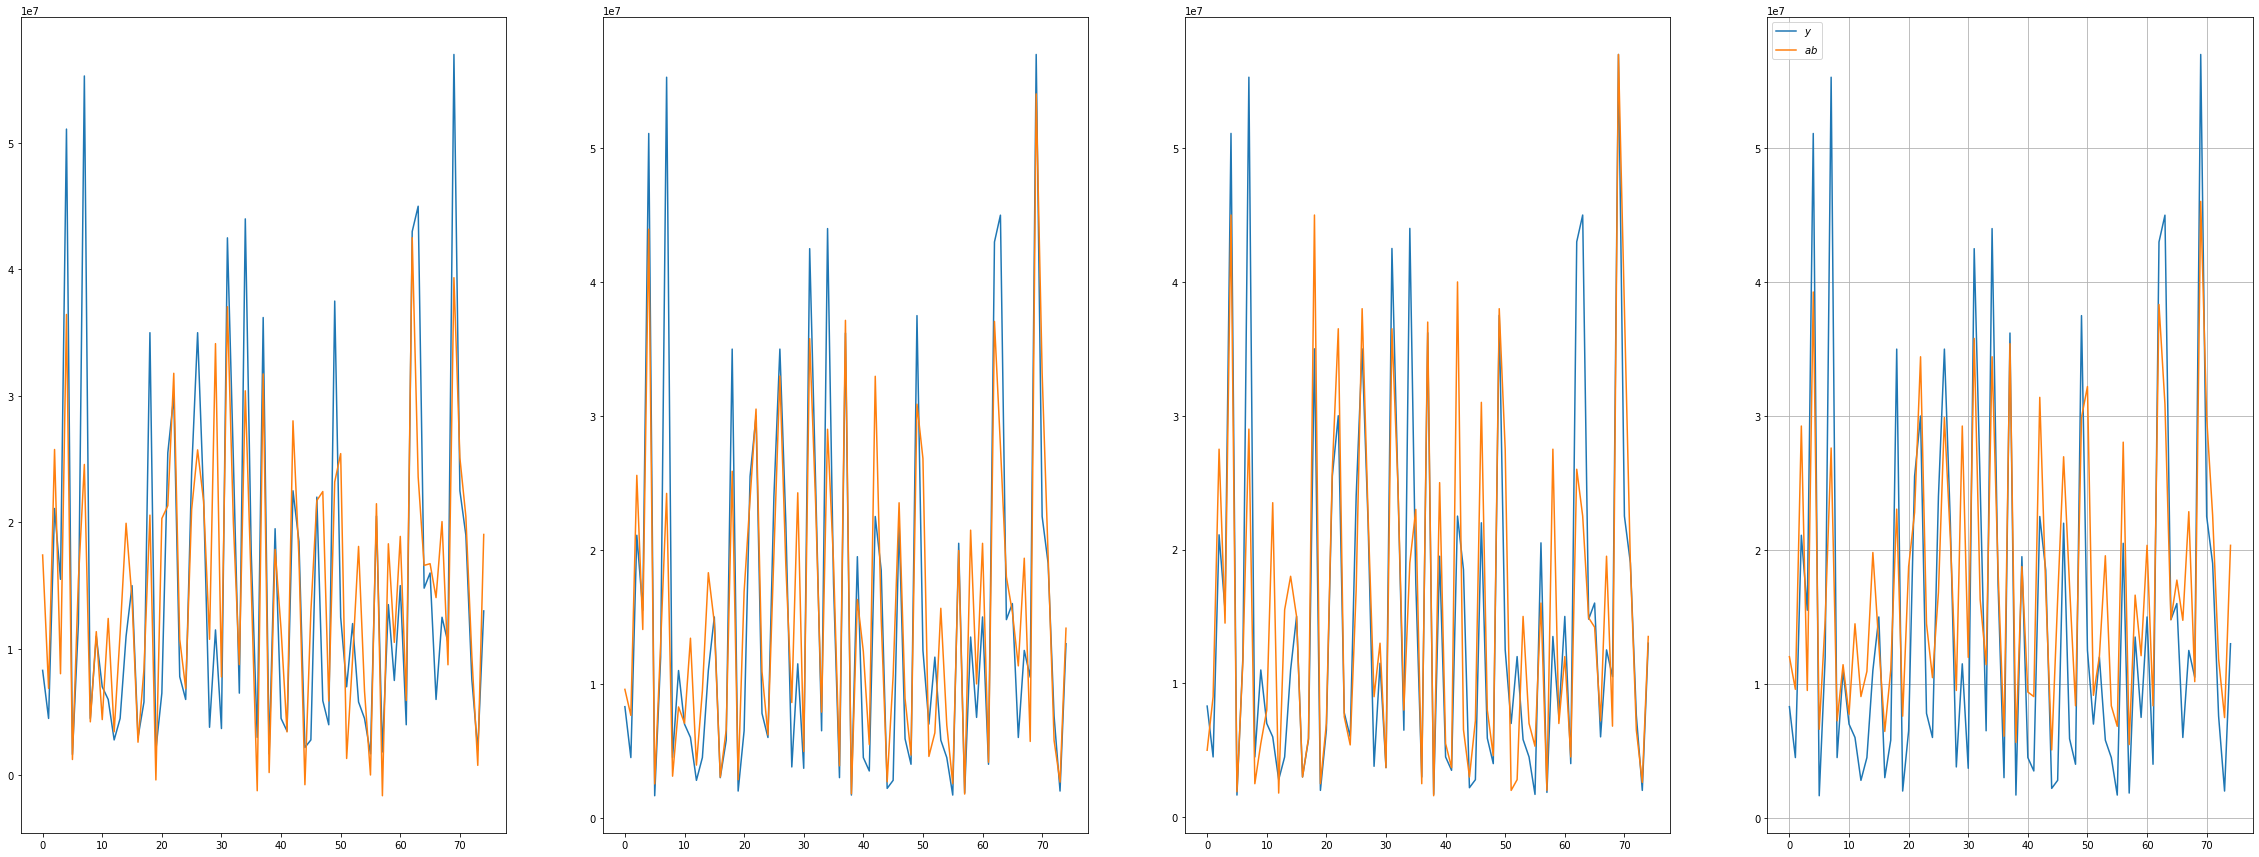

In [153]:
plt.figure(1, figsize=(40 ,15))
y_val=y_test.values
print('LienarRegression')
val = lr.predict(x_train)
val2 = lr.predict(x_test)
plt.subplot(141)
plt.plot(y_val[0:75], label='$y$')
plt.plot(val2[0:75], label='$lr$')
print("score: " + str(r2_score(y_train,val)))
print("score: " + str(r2_score(y_test,val2)))
print('RandomForest')
val = rf_model.predict(x_train)
val2 = rf_model.predict(x_test)
plt.subplot(142)
plt.plot(y_val[0:75], label='$y$')
plt.plot(val2[0:75], label='$rf$')
print("score: " + str(r2_score(y_train,val)))
print("score: " + str(r2_score(y_test,val2)))
print('DecisionTree')
val = h_dat_model.predict(x_train)
val2 = h_dat_model.predict(x_test)
plt.subplot(143)
plt.plot(y_val[0:75], label='$y$')
plt.plot(val2[0:75], label='$dt$')
print("score: " + str(r2_score(y_train,val)))
print("score: " + str(r2_score(y_test,val2)))
print('adaboost')
val = regr.predict(x_train)
val2 = regr.predict(x_test)
plt.subplot(144)
plt.plot(y_val[0:75], label='$y$')
plt.plot(val2[0:75], label='$ab$')
print("score: " + str(r2_score(y_train,val)))
print("score: " + str(r2_score(y_test,val2)))
plt.legend()
plt.grid()
plt.show()

#Prueba con autliers

In [154]:
y = df3[['Price']]
x = df3.drop([ 'Price'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print('x_train shape: ' + str(x_train.shape) + ' y_train shape' + str(y_train.shape) 
  + ' x_test shape' + str(x_test.shape) + ' y_test shape' + str(y_test.shape))

x_train shape: (804, 6) y_train shape(804, 1) x_test shape(201, 6) y_test shape(201, 1)


#Regression

##Linear Regression

In [155]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
val = lr.predict(x_train)
print('Train')
print("score: " + str(r2_score(y_train,val)))
print("MSE: "+ str(mse(y_train,val,squared=False)))
print("MAE: " + str(mean_absolute_error(y_train,val)))
#Validacion
print('Validation')
val2 = lr.predict(x_test)
print("score: " + str(r2_score(y_test,val2)))
print("MSE: "+ str(mse(y_test,val2,squared=False)))
print("MAE: " + str(mean_absolute_error(y_test,val2)))

Train
score: 0.6182166168586476
MSE: 16814989.86333564
MAE: 10042482.805083547
Validation
score: 0.5645311758756075
MSE: 19463505.29537999
MAE: 10891755.379810547


In [156]:
from sklearn import linear_model
lr = linear_model.ElasticNet(alpha=.00001).fit(x_train,y_train)
val = lr.predict(x_train)
print('Train')
print("score: " + str(r2_score(y_train,val)))
print("MSE: "+ str(mse(y_train,val,squared=False)))
print("MAE: " + str(mean_absolute_error(y_train,val)))
#Validation
print('Validation')
val2 = lr.predict(x_test)
print("score: " + str(r2_score(y_test,val2)))
print("MSE: "+ str(mse(y_test,val2,squared=False)))
print("MAE: " + str(mean_absolute_error(y_test,val2)))

Train
score: 0.6182166168382918
MSE: 16814989.863783907
MAE: 10042470.687629353
Validation
score: 0.5645308493285732
MSE: 19463512.592973284
MAE: 10891739.081596894


###Cross Validation Linear Regression

In [157]:
rf = LinearRegression()

scores = cross_val_score(rf, x, y, cv=5)

print("score",scores)

print("mean :%0.03f , deviation: :%0.03f" % (scores.mean(), scores.std()))

score [0.42772247 0.665187   0.31921409 0.38210801 0.61554095]
mean :0.482 , deviation: :0.135


##Random Forest Regressor

In [158]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
val = rf_model.predict(x_train)
print('Train')
print("score: " + str(r2_score(y_train,val)))
print("MSE: "+ str(mse(y_train,val,squared=False)))
print("MAE: " + str(mean_absolute_error(y_train,val)))
#Validacion
print('Validation')
val2 = rf_model.predict(x_test)
print("score: " + str(r2_score(y_test,val2)))
print("MSE: "+ str(mse(y_test,val2,squared=False)))
print("MAE: " + str(mean_absolute_error(y_test,val2)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Train
score: 0.980252615565215
MSE: 3824220.1832796624
MAE: 1995325.845699353
Validation
score: 0.8621394772036661
MSE: 10951219.500165066
MAE: 5798053.845850114


###Cross Validation Random Forest

In [159]:
rf = RandomForestRegressor()

scores = cross_val_score(rf, x, y, cv=5)

print("score",scores)

print("mean :%0.03f , deviation: :%0.03f" % (scores.mean(), scores.std()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

score [0.82820522 0.84446928 0.82375329 0.58031664 0.65713227]
mean :0.747 , deviation: :0.108


##Decision Tree Regressor

In [160]:
from sklearn.tree import DecisionTreeRegressor
h_dat_model = DecisionTreeRegressor()
h_dat_model.fit(x_train, y_train)
val = h_dat_model.predict(x_train)
print('Train')
print("score: " + str(r2_score(y_train,val)))
print("MSE: "+ str(mse(y_train,val,squared=False)))
print("MAE: " + str(mean_absolute_error(y_train,val)))
#Validacion
print('Validation')
val2 = h_dat_model.predict(x_test)
print("score: " + str(r2_score(y_test,val2)))
print("MSE: "+ str(mse(y_test,val2,squared=False)))
print("MAE: " + str(mean_absolute_error(y_test,val2)))

Train
score: 0.9997292672008897
MSE: 447773.65239716205
MAE: 41567.164179104475
Validation
score: 0.7160784019401447
MSE: 15715989.813590983
MAE: 7494875.621890548


##AdaBoost Regressor

In [161]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor( n_estimators=100)
regr.fit(x_train, y_train)
val = regr.predict(x_train)
print('Train')
print("score: " + str(r2_score(y_train,val)))
print("MSE: "+ str(mse(y_train,val,squared=False)))
print("MAE: " + str(mean_absolute_error(y_train,val)))
#Validacion
print('Validation')
val2 = regr.predict(x_test)
print("score: " + str(r2_score(y_test,val2)))
print("MSE: "+ str(mse(y_test,val2,squared=False)))
print("MAE: " + str(mean_absolute_error(y_test,val2)))

Train
score: 0.8669201508042673
MSE: 9927599.507330282
MAE: 7791232.445084092
Validation
score: 0.7644793280317811
MSE: 14313869.029157417
MAE: 9245256.076198945


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##Model comparation

LienarRegression
score: 0.6182166168382918
score: 0.5645308493285732
RandomForest
score: 0.980252615565215
score: 0.8621394772036661
DecisionTree
score: 0.9997292672008897
score: 0.7160784019401447
adaboost
score: 0.8669201508042673
score: 0.7644793280317811


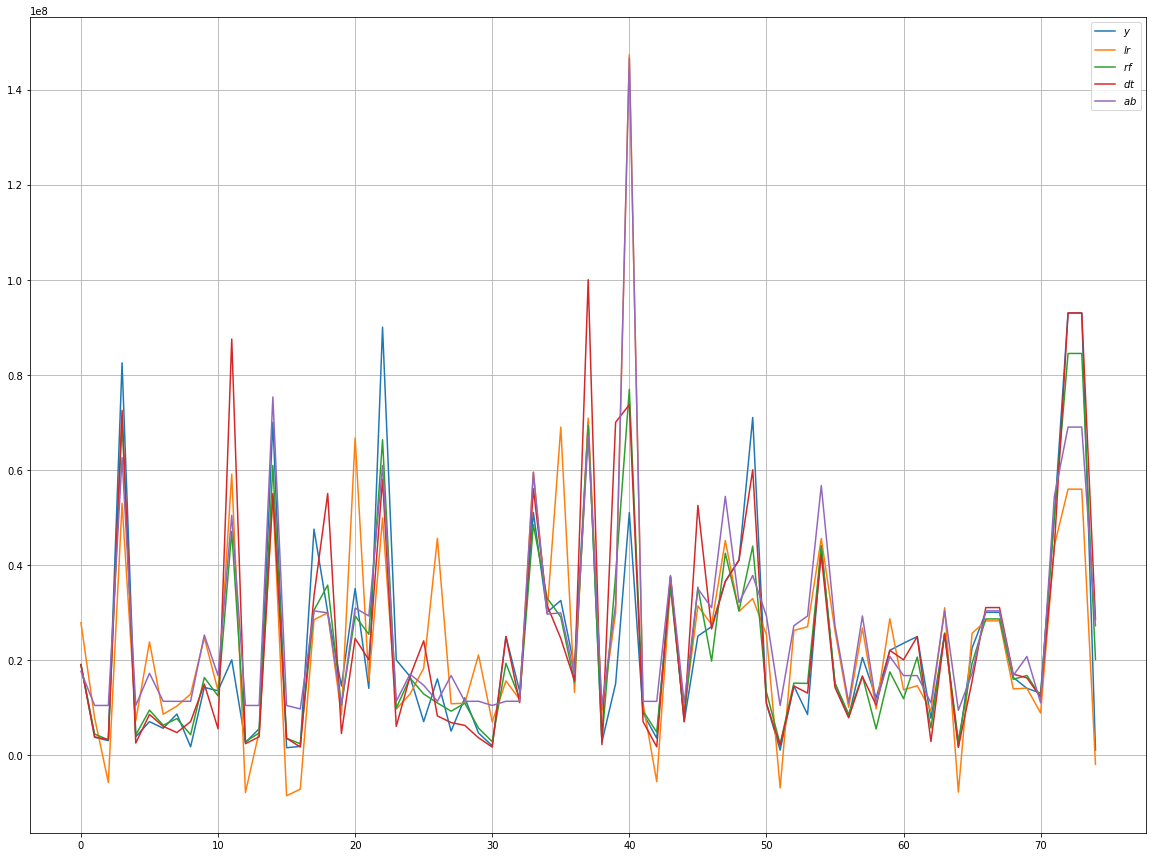

In [162]:
plt.figure(figsize=(20,15))
y_val=y_test.values
plt.plot(y_val[0:75], label='$y$')
print('LienarRegression')
val = lr.predict(x_train)
val2 = lr.predict(x_test)
plt.plot(val2[0:75], label='$lr$')
print("score: " + str(r2_score(y_train,val)))
print("score: " + str(r2_score(y_test,val2)))
print('RandomForest')
val = rf_model.predict(x_train)
val2 = rf_model.predict(x_test)
plt.plot(val2[0:75], label='$rf$')
print("score: " + str(r2_score(y_train,val)))
print("score: " + str(r2_score(y_test,val2)))
print('DecisionTree')
val = h_dat_model.predict(x_train)
val2 = h_dat_model.predict(x_test)
plt.plot(val2[0:75], label='$dt$')
print("score: " + str(r2_score(y_train,val)))
print("score: " + str(r2_score(y_test,val2)))
print('adaboost')
val = regr.predict(x_train)
val2 = regr.predict(x_test)
plt.plot(val2[0:75], label='$ab$')
print("score: " + str(r2_score(y_train,val)))
print("score: " + str(r2_score(y_test,val2)))
plt.legend()
plt.grid()
plt.show()

LienarRegression
score: 0.6182166168382918
score: 0.5645308493285732
RandomForest
score: 0.980252615565215
score: 0.8621394772036661
DecisionTree
score: 0.9997292672008897
score: 0.7160784019401447
adaboost
score: 0.8669201508042673
score: 0.7644793280317811


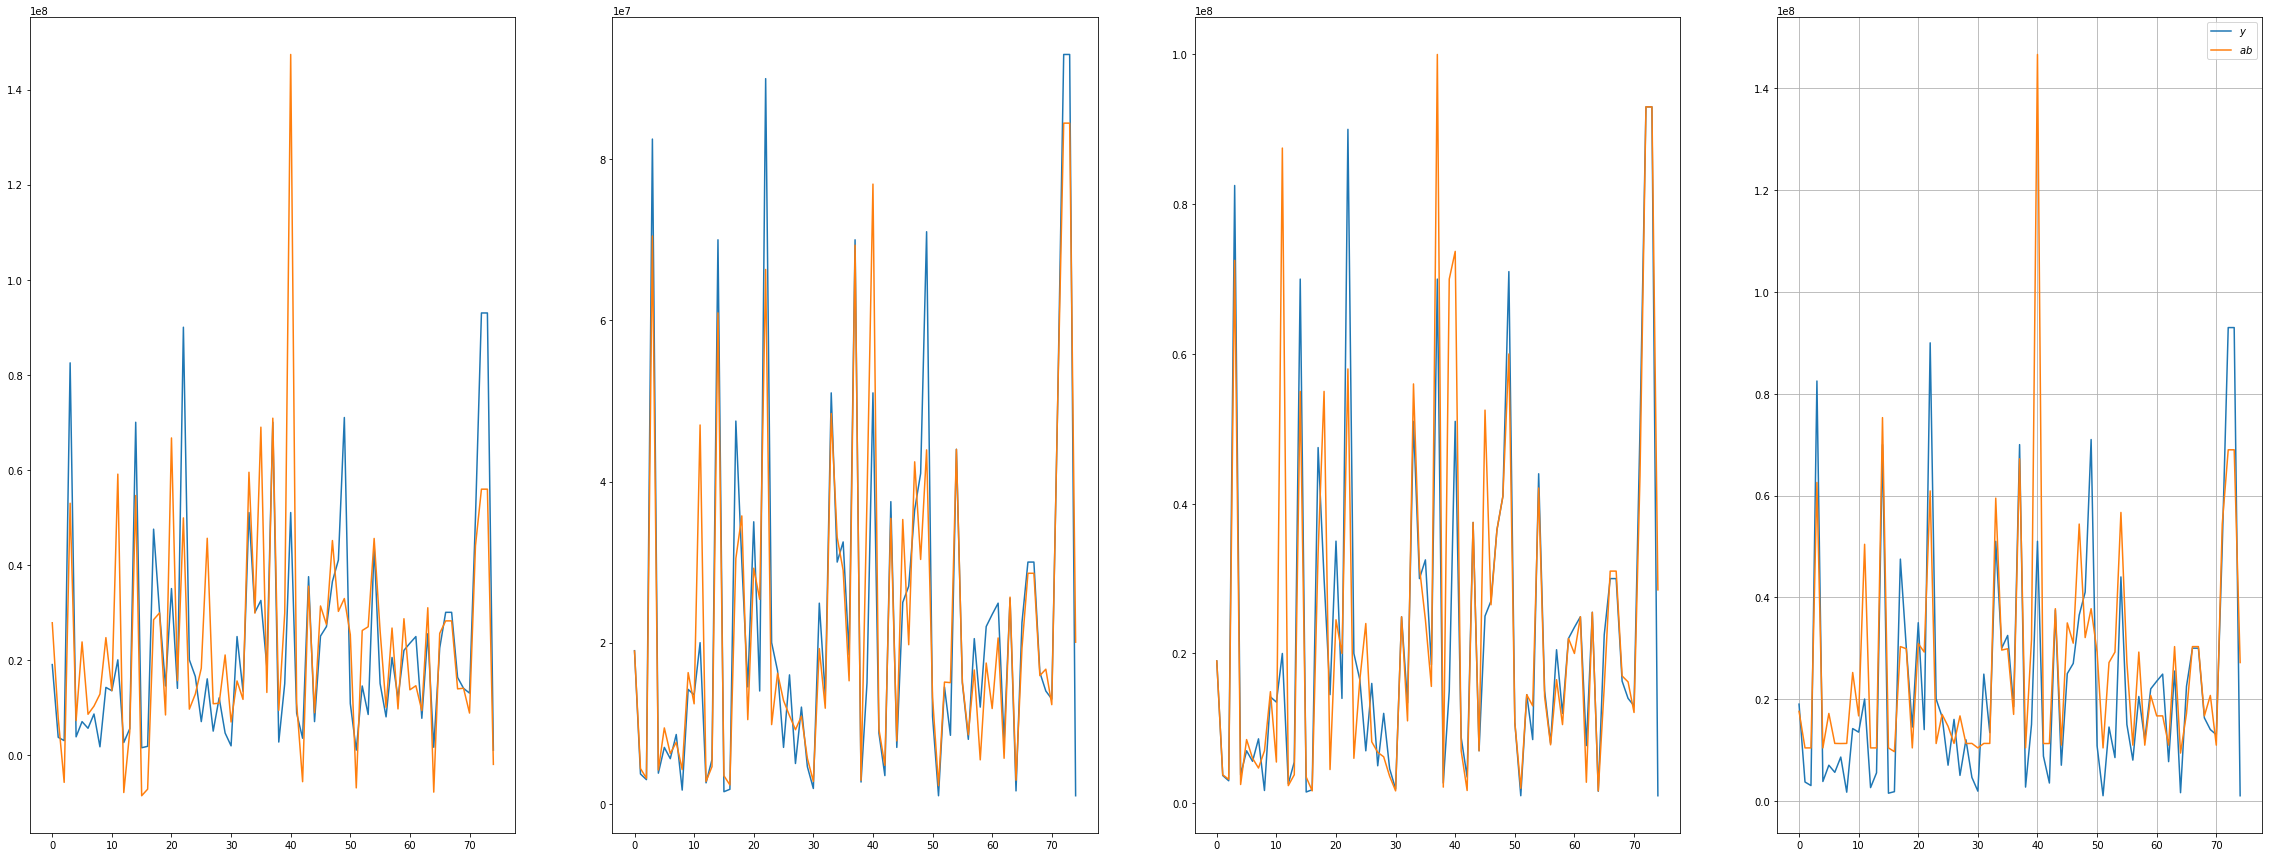

In [163]:
plt.figure(1, figsize=(40 ,15))
y_val=y_test.values
print('LienarRegression')
val = lr.predict(x_train)
val2 = lr.predict(x_test)
plt.subplot(141)
plt.plot(y_val[0:75], label='$y$')
plt.plot(val2[0:75], label='$lr$')
print("score: " + str(r2_score(y_train,val)))
print("score: " + str(r2_score(y_test,val2)))
print('RandomForest')
val = rf_model.predict(x_train)
val2 = rf_model.predict(x_test)
plt.subplot(142)
plt.plot(y_val[0:75], label='$y$')
plt.plot(val2[0:75], label='$rf$')
print("score: " + str(r2_score(y_train,val)))
print("score: " + str(r2_score(y_test,val2)))
print('DecisionTree')
val = h_dat_model.predict(x_train)
val2 = h_dat_model.predict(x_test)
plt.subplot(143)
plt.plot(y_val[0:75], label='$y$')
plt.plot(val2[0:75], label='$dt$')
print("score: " + str(r2_score(y_train,val)))
print("score: " + str(r2_score(y_test,val2)))
print('adaboost')
val = regr.predict(x_train)
val2 = regr.predict(x_test)
plt.subplot(144)
plt.plot(y_val[0:75], label='$y$')
plt.plot(val2[0:75], label='$ab$')
print("score: " + str(r2_score(y_train,val)))
print("score: " + str(r2_score(y_test,val2)))
plt.legend()
plt.grid()
plt.show()